<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [4]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [5]:
use_cuda = True

device = torch.device("cuda" if use_cuda else "cpu")
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

epochs=5
batch_size=2000
model = Net().to(device)

In [6]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True, **kwargs)
    
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True, **kwargs)

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw
Using downloaded and verified file: ../data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw
Using downloaded and verified file: ../data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw
Using downloaded and verified file: ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...


../torch/csrc/utils/tensor_numpy.cpp:135: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Done!


In [7]:
optimizer = torch.optim.Adadelta(model.parameters())

for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)



Train Epoch: 1 [0/60000 (0%)]	Loss: 2.308403
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.054902
Train Epoch: 1 [4000/60000 (7%)]	Loss: 1.982284
Train Epoch: 1 [6000/60000 (10%)]	Loss: 1.798283
Train Epoch: 1 [8000/60000 (13%)]	Loss: 2.322957
Train Epoch: 1 [10000/60000 (17%)]	Loss: 1.510801
Train Epoch: 1 [12000/60000 (20%)]	Loss: 2.086091
Train Epoch: 1 [14000/60000 (23%)]	Loss: 1.196356
Train Epoch: 1 [16000/60000 (27%)]	Loss: 1.415741
Train Epoch: 1 [18000/60000 (30%)]	Loss: 2.356175
Train Epoch: 1 [20000/60000 (33%)]	Loss: 1.584401
Train Epoch: 1 [22000/60000 (37%)]	Loss: 1.040999
Train Epoch: 1 [24000/60000 (40%)]	Loss: 0.910319
Train Epoch: 1 [26000/60000 (43%)]	Loss: 0.998648
Train Epoch: 1 [28000/60000 (47%)]	Loss: 0.825030
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.674228
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.527280
Train Epoch: 1 [34000/60000 (57%)]	Loss: 0.477173
Train Epoch: 1 [36000/60000 (60%)]	Loss: 0.471813
Train Epoch: 1 [38000/60000 (63%)]	Loss: 0.451886
Train Epoc

In [ ]:
for b in test_loader:
    pass

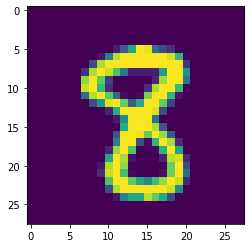

In [19]:
plt.imshow(b[0].detach().cpu().numpy()[0,0] )

In [30]:
res = model(b[0].to(device)[:1])
res

tensor([[-1.6714e+01, -1.4054e+01, -8.8363e+00, -8.9068e+00, -1.5691e+01,
         -1.3380e+01, -1.6269e+01, -1.1996e+01, -2.9278e-04, -1.2580e+01]],
       device='cuda:0', grad_fn=<LogSoftmaxBackward>)

<BarContainer object of 10 artists>

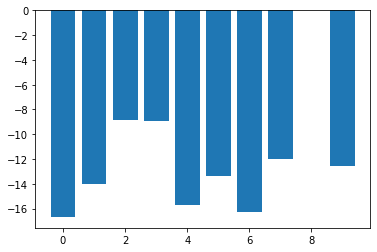

In [31]:
plt.bar(range(10), res.detach().cpu().numpy()[0])

In [33]:
p = list(model.named_parameters())
for x in p:
    print(x[0],':', torch.numel(x[1]))

conv1.weight : 288
conv1.bias : 32
conv2.weight : 18432
conv2.bias : 64
fc1.weight : 1179648
fc1.bias : 128
fc2.weight : 1280
fc2.bias : 10


In [16]:
param = p[0][1]
param.data


tensor([[[[-0.1778,  0.2160, -0.1562],
          [-0.2498,  0.3287,  0.3338],
          [ 0.0827,  0.1157, -0.2219]]],


        [[[-0.0362, -0.1317, -0.0864],
          [ 0.2682,  0.3209,  0.1445],
          [ 0.0390, -0.1257,  0.2463]]],


        [[[-0.1711, -0.1340, -0.1410],
          [ 0.0288, -0.2328,  0.2236],
          [ 0.0702,  0.2597,  0.0077]]],


        [[[ 0.2867,  0.4020, -0.2208],
          [ 0.2556,  0.3275,  0.1281],
          [ 0.0071, -0.3357, -0.2546]]],


        [[[ 0.1315,  0.0074, -0.1273],
          [ 0.1005,  0.2866, -0.3804],
          [ 0.0958, -0.1048,  0.0318]]],


        [[[-0.5412, -0.0485,  0.3391],
          [-0.3502,  0.2956,  0.1419],
          [-0.3551,  0.0093,  0.3081]]],


        [[[ 0.1048, -0.0904, -0.0148],
          [-0.0435,  0.0599, -0.0093],
          [ 0.2936, -0.1868,  0.1078]]],


        [[[ 0.1351,  0.1152,  0.1770],
          [ 0.0157,  0.1192, -0.2279],
          [-0.3656, -0.1112, -0.1889]]],


        [[[-0.0725, -0.3036,  0.